# Support Vector Machine

SVM(Support Vector Machine)은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델입니다. 머신러닝에서 가장 인기있는 모델에 속하고 관심 있는 사람이라면 반드시 알고 있어야 하는 모델입니다. SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합합니다.

# 1. 선형 SVM 분류
## (1) Hard margin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

꽃잎의 길이와 넓이 데이터를 사용할 것입니다.
Setosa, Versicolor의 두 가지 종류만 분류하도록 하겠습니다. (Binary classifier)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

SVM Classifier model

In [3]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

---
밑의 코드를 정확하게 다 이해할 필요는 없습니다.

Line 10을 보면, Margin에 대한 값을 구하는 것을 볼 수 있습니다.

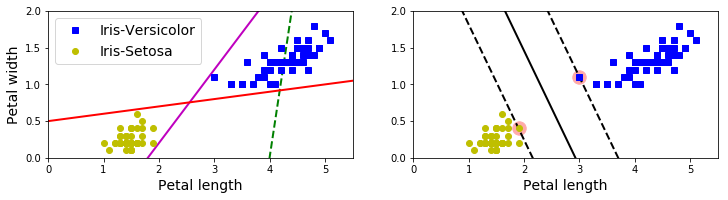

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# SVM이 아닌 3개의 분류 직선
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5
    
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Iris data 입니다. 왼쪽 그래프에 세 개의 선형 분류기에서 만들어진 결정 경계가 있습니다. 점선으로 나타난 결정 경계를 만든 모델은 클래스를 적절하게 분류하지 못하고 있습니다. 다른 두 모델은 훈련 세트에 대해 완벽하게 동작합니다. 하지만 <U>결정 경계가 샘플에 너무 가까워 새로운 샘플에 대해서는 아마 잘 작동하지 못할 것입니다.</U> 

오른쪽 그래프에 있는 실선은 SVM의 분류기의 결정 경계입니다. 이 직선은 두 개의 클래스를 나누고 있을 뿐만 아니라 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있습니다. SVM 분류기는 클래스 사이에 가장 큰 폭(margin)을 찾는 분류기입니다. 그래서 large margin classifier라고 합니다.

*점선으로 표시된 안쪽 영역 외의 바깥 쪽에는 훈련 샘플을 더 추가한다 하더라도, 결정 경계에 전현 영향을 미치지 않습니다.* <font color=red>점선위에 위치한 샘플에 의해 전적으로 결정(또는 의지)됩니다.</font> 이런 샘플을 **Support vector**라고 합니다.

모든 샘플이 마진 폭의 바깥쪽에 올바르게 분류되어 있다면 이를 하드 마진 분류(hard margin classifier)라고 합니다.

---
**SVM은 특성의 스케일에 민감합니다.** 스케일이 조정되지 않는 경우를 살펴보면 수직축의 스케일이 수평축의 스케일보다 훨씬 커서 가장 넓은 마진 폭이 거의 수평에 가깝게 됩니다. 특성의 스케일을 조정하면 결정 경계가 훨씬 좋아집니다.

해당 내용을 코드로 살펴보겠습니다. 해당 코드 내용을 완벽하게 이해하지 못해도 괜찮습니다.

[-2, 2, -2, 2]

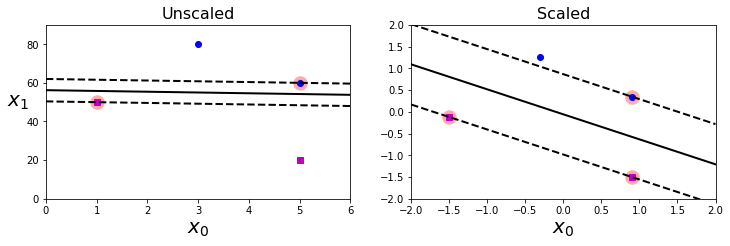

In [5]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# Scale 되지 않은 특성을 plotting 합니다.
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Scale 된 특성을 plotting 합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## (2) Soft margin
하드 마진 분류에는 두 가지 문제점이 있습니다.
 - 데이터가 선형적으로 구분될 수 있어야 제대로 작동합니다.
 - 이상치에 민감합니다.

[0, 5.5, 0, 2]

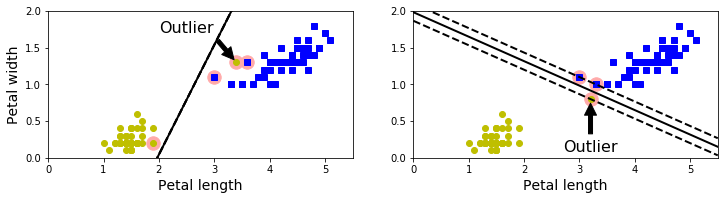

In [6]:
# 이상치 값(outlier)를 추가합니다.
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)


svm_clf1 = SVC(kernel="linear", C=10**9)
svm_clf1.fit(Xo1, yo1)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

# 1번째 아웃라이어에 의한 SVM
plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plot_svc_decision_boundary(svm_clf1, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# 2번째 아웃라이어에 의한 SVM
plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

이상치를 추가했더니, 마진 안쪽이 굉장히 좁아졌습니다. 경계 자체가 생성되지 않을 수도 있습니다.

이런 문제를 피하려면 좀 더 유연한 모델이 필요합니다. 
 - <font color=red>도로의 폭을 가능한 넓게 유지하는 것</font>
 - <font color=red>Margin violation(즉, 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형</font>
 
이를 **소프트 마진 분류(soft margin classification)**이라고 합니다.

Sklearn의 SVM 모델에서는 **슬랙변수**의 coefficient인 C 하이퍼파라미터를 사용해 이 균형을 조절할 수 있습니다. 
 - C 값을 감소시키면 도로의 폭이 넓어지지만 마진 오류도 커집니다. 
 - C 값을 증가시키면 도로의 폭이 좁아지지만 마진 오류는 감소합니다.

**SVM이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있습니다.**

### Slack 변수
Iris 데이터셋을 로드하여, 꽃의 넓이/길이를 이용한 Iris-Virginica를 구분하는 분류기를 생성합니다. 

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

Sklearn의 `Pipeline`은 머신러닝 모델의 학습 파이프라인을 생성해주는 모듈입니다.

In [8]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

`LinearSVC`는 *support_vectors_* attribute를 가지고 있지 않습니다. 따라서 다음과 같이 attribute를 추가해줍니다. `LinearSVC`를 사용하는 이유는 아래에 나와있습니다.

아래의 코드들은 support vector를 시각화하기 위한 코드들입니다. 코드를 완벽하게 이해하지 못해도 괜찮습니다. 다만 슬랙변수의 크기에 따라 margin이 어떻게 변화하는지를 확인하면 됩니다.

In [9]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

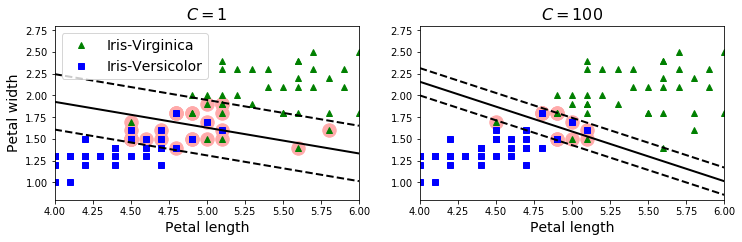

In [10]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

여기서는 `LinearSVC`를 사용했습니다. 이 클래스는 속도가 빠릅니다. `SVC(kernel="linear", C=1)`과 같이 SVC 모델을 사용할 수도 있습니다. 하지만 큰 훈련 세트에서는 속도가 매우 느리므로 사용을 권장하지는 않습니다. `SGDClassifier(loss='hinge', alpha=1/(m*c))`와 같이 사용할 수 있습니다. 이는 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 적용한 것입니다. `LinearSVC`만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나(외부메모리 훈련), 온라인 학습으로 분류 문제를 다룰 때는 아주 유용합니다.

### Hinge Loss(힌지 손실)

$$\max(0, 1 - t)$$

Hinge Loss(힌지 손실함수)입니다. 이 함수는 $t \geq 1$ 일 때 0입니다. 이 함수의 도함수는 $t<1$이면 -1이고 $t>1$이면 0입니다. 

$t=1$에서 미분 가능하지 않지만, 라쏘 회귀 처럼 $t=1$에서 서브그레디언트를 사용해 경사 하강법을 사용할 수 있습니다.

Hinge loss function을 구해보겠습니다.

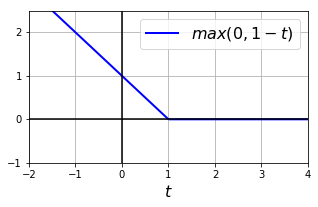

In [11]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)

# 2. 비선형 SVM 분류
## (1) 특성 추가

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, <U>선형적으로 분류할 수 없는 데이터셋이 많습니다.</U> 비선형 데이터셋을 다루는 한 가지 방법은 **다항 특성과 같은 특성을 추가**하는 것입니다. 이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있습니다. 

간단하게 synthetic 데이터를 이용하여 살펴보겠습니다. 해당 코드는 시각화를 위한 부분입니다. 코드를 완벽하게 이해하지 못해도 괜찮습니다.

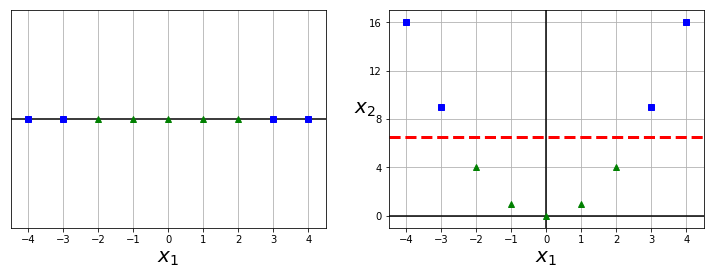

In [12]:
# 분류 하고자하는 데이터
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# 분류가 잘 안되기 때문에, 특성을 하나 더 추가
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

1차원에서는 구분이 되지 않았던 데이터가 2차원으로 차원을 확장하니깐 선형으로 완벽하게 구분할 수 있었습니다.

SKlearn에서는 이를 위해서 `PolynomialFeatures` 변환기와 `StandardScaler`, `LinearSVC`를 연결하여 **Pipeline**을 만들면 좋습니다.

Moon data를 이용해서 한번 더 살펴보겠습니다.

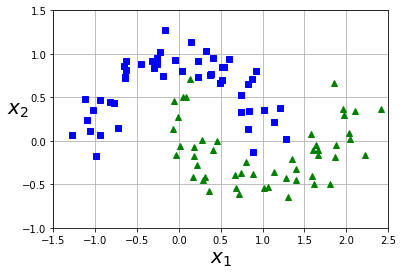

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

분류기로 분류하기 어려운 상황처럼 보입니다.

`PolynomialFeatures`를 이용하여 3차원 특성을 추가하여 보겠습니다.

In [14]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

분류경계를 살펴보면 잘 분류되는 것을 발견할 수 있습니다.

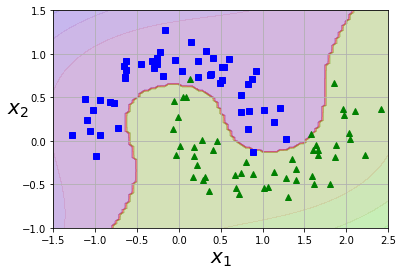

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## (2) 다항식 커널
다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동합니다. 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 <U>모델을 느리게 만듭니다</U>.

SVM에서는 **Kernel trick**이라는 기법을 사용할 수 있습니다. 이것을 사용하면 <font color=red>실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 효과를 낼 수 있습니다.</font> 사실 어떤 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생기지 않습니다.

> 차원 수 변경

In [16]:
from sklearn.svm import SVC

# 3차원
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [17]:
# 10차원
poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

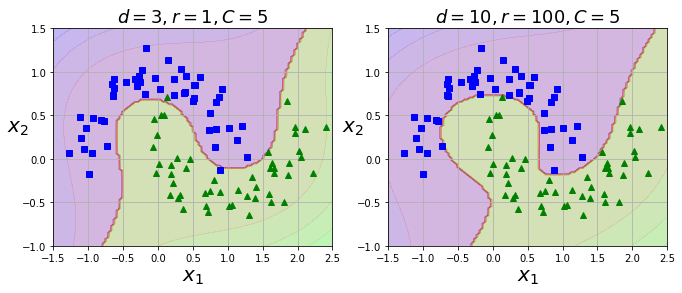

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

두 개의 모델을 비교해보면, 왼쪽보다는 오른쪽 모델이 학습데이터를 더 잘 분류하는 것을 발견할 수 있습니다. 만약 모델이 과대적합이라면 다항식의 차수를 줄여야 합니다. 반대로 과소적합이라면 차수를 늘려야 합니다. 

어떻게 적절한 degree(차수)를 구할 수 있을까요? <U>적절한 하이퍼파라미터를 찾는 일반적인 방법은 그리드 탐색을 사용하는 것입니다.</U> 처음에는 그리드의 폭을 크게 하여 빠르게 검색하고, 그 다음에는 최적의 값을 찾기 위해 그리드를 세밀하게 검색합니다. 단 하이퍼파라미터의 역할을 잘 알고 있으면 파라미터 공간에서 올바른 지역을 탐색하는 데 도움이 됩니다.

## (3) 유사도 특성 추가

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크(또는 center)와 얼마나 닮았는지 측정하는 **유사도 함수(similarity function)로 계산한 특성을 추가하는 것**입니다. 예를 들어 앞에서 본 1차원 데이터셋에 두 개의 랜드마크 $x_1=-2$와 $x_1=1$을 추가합시다. 그리고 $\gamma=0.3$인 Gaussian Radial Basis Function(RBF)를 유사도 함수로 정의하겠습니다.
$$\phi_{\gamma}=\exp{\gamma||x-l||^2}$$

이 함수의 값은 0(랜드마크에서 아주 멀리 떨어진 경우)부터 1(랜드마크와 같은 위치일 경우)까지 변화하며 종 모양으로 나타납니다. $x_1=-1$샘플을 살펴봅시다. 이 샘플은 첫 번째 landmark에서 1만큼 떨어져 있고 두 번째 landmark에서 2만큼 떨어져 있습니다. 그러므로 새로 만든 특성은 $x_2=\exp({-0.3\times 1^2})\approx 0.74$와 $x_3=\exp({-0.3\times 2^2})\approx 0.74$ 입니다.

In [19]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# 유사도 함수를 추가
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

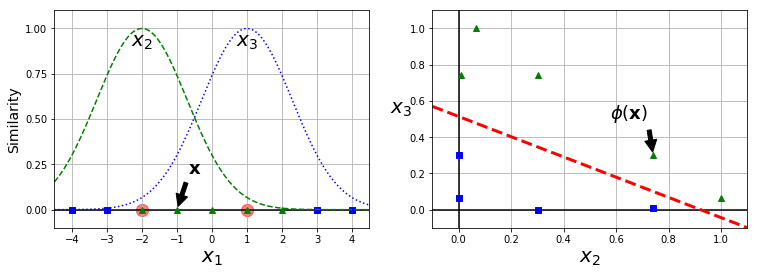

In [20]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

In [21]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


랜드마크를 선택하는 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것입니다. 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높습니다. 단점은 훈련 세트에 있는 $n$개 특성을 가진 $m$개의 샘플이 $m$개의 특성을 가진 $m$개의 샘플로 변환된다는 것입니다.(원본 특성은 제외한다고 가정합니다.) 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어집니다.

## (4) Gaussian Radial Basis Function(RBF) 커널

다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있습니다. 추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그렇습니다. 하지만 <font color=green>커널 트릭을 사용하여 유사도 특성을 많이 추가하는 것과 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있습니다.</font>

In [22]:
# 사용할 하이퍼파라미터들을 정의합니다.
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

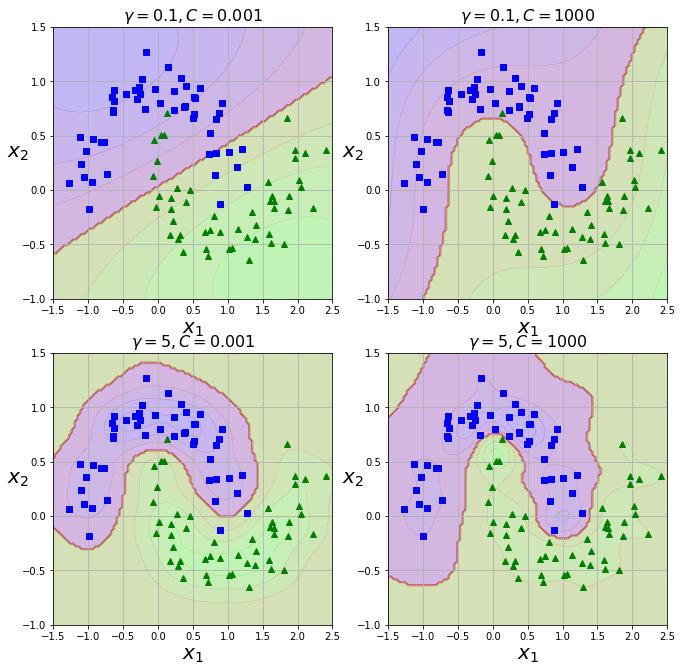

In [23]:
from sklearn.svm import SVC

svm_clfs = []

# SVC 모델에 가우시안 RBF 커널을 적용해보겠습니다.
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 11))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

$\gamma$를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아집니다. 결졍 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어집니다. 반대로 작은 $\gamma$ 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워집니다. 결국 하이퍼파라미터 $\gamma$가 규제의 역할을 합니다. 모델이 과대적합일 경우엔 감소시켜야 하고 과소적합일 경우엔 증가시켜야 합니다.

다른 커널도 있지만 거의 사용되지 않습니다. 예를 들어 어떤 커널은 특정 데이터 구조에 특화되어 있습니다. **String kernel**은 가끔 텍스트 문서나 DNA 서열을 분류할 때 사용합니다. (String Subsequence Kernel 이나 Levenshtein Distance 기반의 커널)

여러 가지 커널 중 어떤 것을 사용해야 할까요? 경험적으로, 언제나 선형 커널을 가장 먼저 시도해봐야합니다.(`LinearSVC`가 `SVC(kernel="linear")`보다 훨씬 빠르다). 특히 훈련 세트가 아주 크거나 특성 수가 많을 경우에 특히 그렇습니다. 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 시도해 보면 좋습니다. 대부분의 경우 이 커널이 잘 맞는다. 시간과 컴퓨팅 성능이 충분하다면(특히 훈련 데이터의 구조에 특화된 커널이 있는 경우) 교차 검증과 그리드 탐색을 사용해 다른 커널을 좀 더 시도해 볼 수 있습니다. 

# 3. 계산 복잡도

`LinearSVC`는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 합니다. 이 라이브러리는 커널 트릭을 지원하지 않지만, 훈련 샘플과 특성수에 거의 선형적으로 증가합니다. 이 알고리즘의 훈련 시간 복잡도는 대략 $O(m\times n)$ 정도입니다.

정밀도를 높이면 알고리즘의 수행 시간이 길어집니다. 이는 허용오차 하이퍼파라미터 $\epsilon$으로 조절합니다.(Sklearn에서는 매개변수 `tol`) 대부분의 분류 문제는 허용오차를 기본값으로 두면 잘 작동합니다. (`SVC`의 경우는 0.001이고, `LinearSVC`의 경우는 0.0001입니다). 

SVC는 커널 트릭 알고리즘을(SMO) 구현한 libsvm 라이브러리를 기반으로 합니다. 훈련의 시간 복잡도는 보통 $O(m^2 \times n)과 O(m^3 \times n)$ 사이입니다. 불행하게도 이는 훈련 샘플 수가 커지면(예를 들어 수십만 개 샘플) 엄청나게 느려진다는 것을 의미합니다. 복잡하지만 작거나 중간 규모의 훈련 세트에 이 알고리즘이 잘 맞습니다. 하지만 특성의 개수에는, 특히 희소 특성(sparse features 각 샘플에 0이 아닌 특성이 몇 개 없는 경우)인 경우에는 잘 확장됩니다. 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례합니다. 

# 4. SVM 회귀

SVM 알고리즘은 선형, 비선형 회귀에도 사용할 수 있습니다. 회귀에 적용하는 방법은 목표를 반대로 하는 것입니다. 일정한 마진 오류안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습합니다. 도로의 폭은 하이퍼파라미터 $\epsilon$으로 조절합니다.

## (1) 선형 회귀

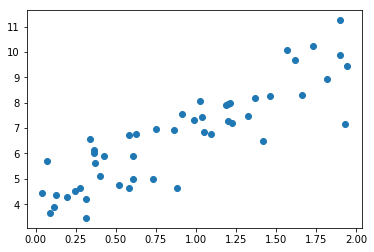

In [24]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

plt.plot(X, y, 'o')

In [25]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [26]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

밑의 코드는 시각화를 위한 코드입니다. 내용을 모두 정확하게 이해하지 못해도 괜찮습니다. 다만 $\epsilon$을 조절하여 샘플들이 최대한 모일 수 있도록 한다는 것을 확인하면 됩니다.

Text(0.5,1,'$\\epsilon = 0.5$')

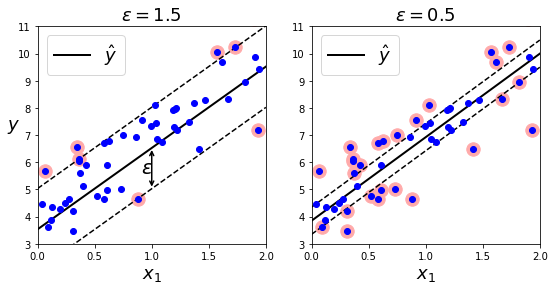

In [27]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

<font color=red>Margin 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없습니다. 그래서 이 모델을 $\epsilon$-intensive 라고 말합니다.</font>

## (2) 비선형 회귀

In [28]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

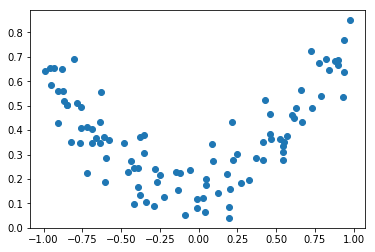

In [29]:
plt.plot(X, y, 'o')

In [30]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5,1,'$degree=2, C=0.01, \\epsilon = 0.1$')

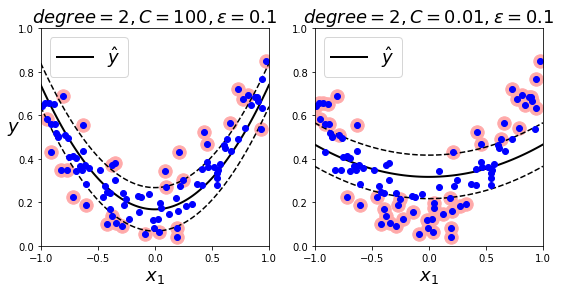

In [31]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".
          format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".
          format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

비선형 회귀 작업을 처리하려면 커널 SVM을 사용합니다. 왼쪽 그래프는 규제가 거의 없고(아주 큰 C) 오른쪽 그래프는 규제가 훨씬 많습니다(즉 아주 작은 C).

`SVR`은 `SVC`의 회귀 버전이고 `LinearSVR`은 `LinearSVC`의 회귀 버전입니다. `LinearSVR`은 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어납니다. 하지만 `SVR`은 훈련 세트가 커지면 훨씬 느려집니다.